<a href="https://colab.research.google.com/github/ahmedmusawir/modern-agents-youtube-series/blob/main/LangGraph_Chatbot_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

### INSTALLATIONS

In [ ]:
!pip install -q langchain
!pip install -q langchain_openai
!pip install -q langchain_community
!pip install -q langgraph-checkpoint-sqlite
!pip install -q langgraph
!pip show langchain

Name: langchain
Version: 0.3.4
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community


### LOADING API KEY

In [ ]:
import os
os.environ["OPENAI_API_KEY"] ="sk-proj-u*********************Wg7y8Ge8pROt"
os.environ["TAVILY_API_KEY"] ="tvly-Yhk******************L5RCyaFG"

### TESTING THE MODEL RESPONSE

In [ ]:
from langchain_openai import ChatOpenAI
import pprint

# Create an instance of the OpenAI class
llm = ChatOpenAI(model="gpt-4o")

# Generate text
prompt = "Who is Trump (in one sentence)"
response = llm.invoke(prompt)
# print(response)
pprint.pprint(response.content)

('Donald Trump is an American businessman, television personality, and '
 'politician who served as the 45th President of the United States from 2017 '
 'to 2021.')


# TAVILY SEARCH

In [ ]:
!pip install -q tavily-python

### LET'S SEARCH

In [ ]:
from tavily import TavilyClient
import os
import pprint

# initializing a Tavily client
client = TavilyClient(api_key=os.environ.get('TAVILY_API_KEY'))

response = client.search(query='Election 2024 USA')
# response
pprint.pprint(response['results'])

[{'content': '2024 election guide: Presidential candidates, polls, primaries '
             'and caucuses, voter information and results for November 5, 2024 '
             '... US election looms over NATO discussions to Trump-proof '
             'Ukraine aid.',
  'raw_content': None,
  'score': 0.9991204,
  'title': 'Election 2024: Campaign news, presidential polls and results | CNN '
           'Politics',
  'url': 'https://www.cnn.com/election/2024'},
 {'content': 'Election 2024 Polls: Harris vs. Trump. Updated Oct. 22, 2024. '
             'Leer en español. ... With two weeks to go, the polls of the '
             'presidential election are starting to run out of room to get any '
             'closer.',
  'raw_content': None,
  'score': 0.99850464,
  'title': 'Election 2024 Polls: Harris vs. Trump - The New York Times',
  'url': 'https://www.nytimes.com/interactive/2024/us/elections/polls-president.html'},
 {'content': 'See the latest polls, trends and odds for the 2024 president

### A BETTER LOOK

In [ ]:
for result in response['results']:
    print(f"Title: {result['title']}, URL: {result['url']}")

Title: Election 2024: Campaign news, presidential polls and results | CNN Politics, URL: https://www.cnn.com/election/2024
Title: Election 2024 Polls: Harris vs. Trump - The New York Times, URL: https://www.nytimes.com/interactive/2024/us/elections/polls-president.html
Title: Who Is Favored To Win The 2024 Presidential Election?, URL: https://projects.fivethirtyeight.com/2024-election-forecast/
Title: 2024 United States elections - Wikipedia, URL: https://en.wikipedia.org/wiki/2024_United_States_elections
Title: 2024 United States presidential election - Wikipedia, URL: https://en.wikipedia.org/wiki/2024_United_States_presidential_election


### ADVANCED LOOK: Q & A STYLE

In [ ]:
response = client.search(
    query='Who is running in the usa election 2024?',
    search_depth='advanced',
    max_results=7,
    include_images=True,
    include_answer=True,
    include_raw_content=False
)

# response
# response['results']
response['answer']

'Based on the most recent data available, the candidates running in the 2024 USA election are former President Donald Trump as the Republican presidential nominee and Vice President Kamala Harris as the Democratic nominee. The polls suggest that Kamala Harris and Donald Trump are within a couple of percentage points of each other both nationally and in battleground states.'

### SIMPLIFIED Q & A

In [ ]:
answer = client.qna_search(query='Who will win the USA election 2024?')
pprint.pprint(answer)

('Based on the most recent data available up to December 5, 2023, the polls '
 'suggest that the race between Kamala Harris and Donald Trump for the 2024 '
 'USA election is very close, with both candidates within a couple of '
 'percentage points of each other nationally and in battleground states. '
 'Therefore, it is difficult to predict a clear winner at this time.')


# LET'S WORK WITH THE LLM

In [ ]:
from langchain_openai import ChatOpenAI

query = 'Where is Joe Biden now?'

response = client.search(query, max_results=5, search_depth='advanced')['results']
response

### LET'S SETUP A PROMPT & LLM

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# Setting up the prompt TO BUILD THE RESEARCHER
template = """You are an AI critical thinker research assistant.
Your sole purpose is to write well written, objective and structured reports on given text.

Information: "{response}"
Using the above information, answer the following query: "{query}" in a detailed report."""

# Preparing the prompt with your specific data
prompt = ChatPromptTemplate.from_template(template)
formatted_prompt = prompt.format(response=response, query=query)

# Initializing the model (e.g., GPT-4o)
llm = ChatOpenAI(model='gpt-4o')

# Getting the result
result = llm.invoke(formatted_prompt)
print(result.content)


**Report: Current Status and Location of President Joe Biden**

**Introduction:**
This report aims to provide a detailed analysis of the current status and location of President Joe Biden based on the provided information. The report synthesizes data from various sources to present an objective account of the President's whereabouts and relevant activities.

**Current Location:**
According to an article from NBC Chicago, President Joe Biden is currently isolated at his Rehoboth, Delaware, beach home. This isolation is due to his recent COVID-19 diagnosis. The information is sourced from a high-confidence document with a score of 0.99448806, indicating high reliability.

**Background and Context:**
The President's isolation comes amidst his ongoing responsibilities and commitments. As noted in the source from The White House, President Biden has a longstanding political career serving as the U.S. Senator for Delaware for 36 years and as the 47th Vice President of the United States. His 

### THE OPENAI APPROACH

In [ ]:
from langchain.adapters.openai import convert_openai_messages

# BUILDING THE RESEARCHER
prompt = [
    {
        'role': 'system',
        'content': f'''You are an AI critical thinker research assistant.
        Your sole purpose is to write well written, objective and structured reports on given text.'''
    },
    {
        'role': 'user',
        'content': f'''Information: """{response}"""
        Using the above information, answer the following query: """{query}""" in a detailed report'''
    }
]

lc_messages = convert_openai_messages(prompt)
lc_messages

[SystemMessage(content='You are an AI critical thinker research assistant.\n        Your sole purpose is to write well written, objective and structured reports on given text.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information: """[{\'title\': \'Where is Joe Biden and where was he last seen? - NBC Chicago\', \'url\': \'https://www.nbcchicago.com/news/local/where-is-joe-biden-kamala-harris-shares-update-as-president-battles-covid-19/3497549/\', \'content\': \'Biden, remains isolated at his Rehoboth, Delaware, beach home, where he has been since his COVID-19 diagnosis.\', \'score\': 0.99448806, \'raw_content\': None}, {\'title\': \'Joe Biden: The President | The White House\', \'url\': \'https://www.whitehouse.gov/administration/president-biden/\', \'content\': \'After leaving the White House, the Bidens continued their efforts to expand opportunity for every American with the creation of the Biden Foundation, the Biden Cancer Initiative, the Penn Biden Cen

### LET'S USE THIS IN LANGCHAIN

In [ ]:
response = ChatOpenAI(model='gpt-4o').invoke(lc_messages)
print(response.content)

### Report: Current Location of President Joe Biden

#### Introduction
This report aims to provide an objective analysis of the current whereabouts of President Joe Biden based on the provided information. The focus is on determining his location and any relevant context surrounding his activities.

#### Current Location
Based on the information extracted from the sources, President Joe Biden is currently isolated at his Rehoboth, Delaware, beach home. This isolation is due to his recent COVID-19 diagnosis, as reported by NBC Chicago. The report underscores that he has been at this location since the diagnosis was confirmed.

#### Context and Implications
- **Health Status**: The isolation indicates adherence to health protocols following a COVID-19 diagnosis. This measure is likely aimed at preventing the spread of the virus and ensuring the President's recovery in a controlled environment.
  
- **Location Significance**: Rehoboth Beach, Delaware, is a location of personal significanc

# LET'S ENHANCE OUR CHATBOT

### CREATE THE TOOLS

In [ ]:
# defining the tools
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=3)
tools = [tool]

### INVOKE THE TOOL

In [ ]:
response = tool.invoke('Who is running in USA election 2024?')
response

[{'url': 'https://www.cnn.com/interactive/2024/politics/presidential-candidates-dg/',
  'content': '2024 Presidential Candidates. By CNN Staff. Updated September 10, 2024. Former President Donald Trump is the Republican presidential nominee and Vice President Kamala Harris is the Democratic'},
 {'url': 'https://www.bbc.com/news/articles/cj4x71znwxdo',
  'content': 'US election polls 2024: Who is ahead - Harris or Trump? US election polls: Who is ahead - Harris or Trump? In a sign of how the race has changed since Harris became the Democratic nominee, on the day Joe Biden quit the race he was trailing Trump by nearly five percentage points on average in these seven battleground states. At the moment, the polls suggest that Kamala Harris and Donald Trump are within a couple of percentage points of each other both nationally and in battleground states - and when the race is that close, it’s very hard to predict winners. Read more about: Kamala Harris | Donald Trump | US election'},
 {'url

# THE NEW GRAPH


In [ ]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

# NEW IMPORT
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

tool = TavilySearchResults(max_results=3)
tools = [tool]

llm = ChatOpenAI(model_name='gpt-4o', temperature=0.5)

# tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)

# change the chatbot() node function. Use llm_with_tools instead of llm.
def chatbot(state: State):
    # NEWLY EDITED
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

# NEWLY ADDED:
# run the tools if they are called by adding the tools to a new node.
# This node runs the tools requested in the last AIMessage.
tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)
# ---

# NEWLY ADDED
# define the conditional_edges.
# we'll use the prebuilt tools_condition in the conditional_edge to route to the ToolNode if the last message has tool calls,
# otherwise, route to the end.
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# ---

# any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")

graph_builder.set_entry_point("chatbot")

# we don't need to explicitly set a finish_point because our graph already has a way to finish!
# graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

### LET'S VISUALIZE THE GRAPH

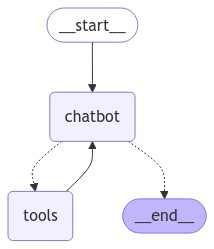

In [ ]:
# Let's visualize the graph we've built.
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))


# THE CHATBOT

In [ ]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    for event in graph.stream({'messages': ('user', user_input)}):
        for value in event.values():
            print('Assistant: ', value['messages'][-1].content)
        print('-' * 50)



User: who are the presidential candidates in 2024 usa election now
Assistant:  
--------------------------------------------------
Assistant:  [{"url": "https://www.cnn.com/interactive/2024/politics/presidential-candidates-dg/", "content": "2024 Presidential Candidates. By CNN Staff. Updated October 21, 2024. Former President Donald Trump is the Republican presidential nominee and Vice President Kamala Harris is the Democratic nominee."}, {"url": "https://ballotpedia.org/Presidential_candidates,_2024", "content": "The following candidates have qualified to appear on five or more Democratic primary ballots:\nRepublican candidates\nThe following candidates have qualified to appear on five or more Republican primary ballots:\nComparison of announcement timelines in previous cycles\nThe chart below shows noteworthy presidential campaign announcements in the odd years before the 2016, 2020, and 2024 presidential elections.\n Email *\nFirst Name *\nLast Name\nPlease complete the Captcha abov

# ADDING MEMORY

In [ ]:
!pip install -q langgraph-checkpoint-sqlite

### MEMORY ADDED TO THE GRAPH

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver

memory = SqliteSaver.from_conn_string(':memory:')
graph = graph_builder.compile(checkpointer=MemorySaver()) # ADDING MEMORY


### THE CHATBOT WITH MEMORY

In [ ]:

while True:

    user_input = input('User: ')
    if user_input.lower() in ['quit', 'exit', 'bye',  'q']:
        print('Goodbye!')
        break

    config = {'configurable': {'thread_id': '1'}}

    # response = graph.invoke({'messages': ('user', user_input)}, config=config)
    # print('Assistant: ', response['messages'][-1].content)
    # print('-' * 50)

    for event in graph.stream({'messages': ('user', user_input)}, config=config):
      for value in event.values():
          print('Assistant: ', value['messages'][-1].content)
      print('-' * 50)


User: hi i am rambo
Assistant:  Hello Rambo! How can I assist you today?
--------------------------------------------------
User: does my name ring a bell
Assistant:  Yes, the name "Rambo" is quite iconic! It is most famously associated with the fictional character John Rambo, played by Sylvester Stallone in the "Rambo" film series. The character is a former Green Beret and Vietnam War veteran known for his combat skills and survival abilities. Is there something specific you'd like to know or discuss about Rambo?
--------------------------------------------------
User: who are the presidential candidates in 2024 usa election now
Assistant:  
--------------------------------------------------
Assistant:  [{"url": "https://www.cnn.com/interactive/2024/politics/presidential-candidates-dg/", "content": "2024 Presidential Candidates. By CNN Staff. Updated October 21, 2024. Former President Donald Trump is the Republican presidential nominee and Vice President Kamala Harris is the Democrati